In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn import model_selection 
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score 
from sklearn.linear_model import LogisticRegression 
from sklearn.tree import DecisionTreeClassifier 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

In [2]:
df = pd.read_csv(r'C:\Users\matsa\Downloads\heloc_dataset_v1.csv')

In [3]:
df.shape,df.size

((10459, 24), 251016)

In [4]:
print(df.columns)

Index(['RiskPerformance', 'ExternalRiskEstimate', 'MSinceOldestTradeOpen',
       'MSinceMostRecentTradeOpen', 'AverageMInFile', 'NumSatisfactoryTrades',
       'NumTrades60Ever2DerogPubRec', 'NumTrades90Ever2DerogPubRec',
       'PercentTradesNeverDelq', 'MSinceMostRecentDelq',
       'MaxDelq2PublicRecLast12M', 'MaxDelqEver', 'NumTotalTrades',
       'NumTradesOpeninLast12M', 'PercentInstallTrades',
       'MSinceMostRecentInqexcl7days', 'NumInqLast6M', 'NumInqLast6Mexcl7days',
       'NetFractionRevolvingBurden', 'NetFractionInstallBurden',
       'NumRevolvingTradesWBalance', 'NumInstallTradesWBalance',
       'NumBank2NatlTradesWHighUtilization', 'PercentTradesWBalance'],
      dtype='object')


In [5]:
df.head()

,RiskPerformance,ExternalRiskEstimate,MSinceOldestTradeOpen,MSinceMostRecentTradeOpen,AverageMInFile,NumSatisfactoryTrades,NumTrades60Ever2DerogPubRec,NumTrades90Ever2DerogPubRec,PercentTradesNeverDelq,MSinceMostRecentDelq,...,PercentInstallTrades,MSinceMostRecentInqexcl7days,NumInqLast6M,NumInqLast6Mexcl7days,NetFractionRevolvingBurden,NetFractionInstallBurden,NumRevolvingTradesWBalance,NumInstallTradesWBalance,NumBank2NatlTradesWHighUtilization,PercentTradesWBalance
0,Bad,55,144,4,84,20,3,0,83,2,...,43,0,0,0,33,-8,8,1,1,69
1,Bad,61,58,15,41,2,4,4,100,-7,...,67,0,0,0,0,-8,0,-8,-8,0
2,Bad,67,66,5,24,9,0,0,100,-7,...,44,0,4,4,53,66,4,2,1,86
3,Bad,66,169,1,73,28,1,1,93,76,...,57,0,5,4,72,83,6,4,3,91
4,Bad,81,333,27,132,12,0,0,100,-7,...,25,0,1,1,51,89,3,1,0,80


In [7]:
df.dtypes

RiskPerformance                       object
ExternalRiskEstimate                   int64
MSinceOldestTradeOpen                  int64
MSinceMostRecentTradeOpen              int64
AverageMInFile                         int64
NumSatisfactoryTrades                  int64
NumTrades60Ever2DerogPubRec            int64
NumTrades90Ever2DerogPubRec            int64
PercentTradesNeverDelq                 int64
MSinceMostRecentDelq                   int64
MaxDelq2PublicRecLast12M               int64
MaxDelqEver                            int64
NumTotalTrades                         int64
NumTradesOpeninLast12M                 int64
PercentInstallTrades                   int64
MSinceMostRecentInqexcl7days           int64
NumInqLast6M                           int64
NumInqLast6Mexcl7days                  int64
NetFractionRevolvingBurden             int64
NetFractionInstallBurden               int64
NumRevolvingTradesWBalance             int64
NumInstallTradesWBalance               int64
NumBank2Na

In [8]:
X = df.iloc[:,1:].values
y = df.iloc[:,0].values

In [16]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [32]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [33]:
algorithms = [] 
scores = [] 
names = [] 
  
algorithms.append(('Logisitic Regression', LogisticRegression())) 
algorithms.append(('K-Nearest Neighbours', KNeighborsClassifier())) 
algorithms.append(('Decision Tree Classifier', DecisionTreeClassifier())) 
algorithms.append(('LDA',LinearDiscriminantAnalysis())) 
algorithms.append(('Naive bayes clasifier', GaussianNB())) 
algorithms.append(('Support Vector Machine', SVC())) 
  
for name, algo in algorithms: 
    
    k_fold = model_selection.KFold(n_splits = 10, random_state=None )
  
    # Applying k-cross validation 
    cvResults = model_selection.cross_val_score(algo, X_train, y_train, 
                                      cv = k_fold, scoring ='accuracy') 
  
    scores.append(cvResults) 
    names.append(name) 
    print(str(name)+' : '+str(cvResults.mean()))

c:\users\matsa\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\users\matsa\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\users\matsa\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\users\matsa\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\users\matsa\appdata\local\programs\python\python37\lib\si

Logisitic Regression : 0.7169875211230988
K-Nearest Neighbours : 0.6796318081372676
Decision Tree Classifier : 0.6226395749382556
LDA : 0.7173695242428181
Naive bayes clasifier : 0.7163494410503055


c:\users\matsa\appdata\local\programs\python\python37\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
c:\users\matsa\appdata\local\programs\python\python37\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
c:\users\matsa\appdata\local\programs\python\python37\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureW

Support Vector Machine : 0.7158406993370596


In [29]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

lda = LDA(n_components=1)
X_train = lda.fit_transform(X_train, y_train)
X_test = lda.transform(X_test)

c:\users\matsa\appdata\local\programs\python\python37\lib\site-packages\sklearn\discriminant_analysis.py:466: ChangedBehaviorWarning: n_components cannot be larger than min(n_features, n_classes - 1). Using min(n_features, n_classes - 1) = min(1, 2 - 1) = 1 components.
  ChangedBehaviorWarning)
c:\users\matsa\appdata\local\programs\python\python37\lib\site-packages\sklearn\discriminant_analysis.py:472: FutureWarning: In version 0.23, setting n_components > min(n_features, n_classes - 1) will raise a ValueError. You should set n_components to None (default), or a value smaller or equal to min(n_features, n_classes - 1).
  warnings.warn(future_msg, FutureWarning)


In [37]:
from sklearn.ensemble import RandomForestClassifier

classifier = RandomForestClassifier(max_depth=2, random_state=0)

classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

c:\users\matsa\appdata\local\programs\python\python37\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [36]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

cm = confusion_matrix(y_test, y_pred)
print(cm)
print('Accuracy' + str(accuracy_score(y_test, y_pred)))

[[1060  296]
 [ 439  820]]
Accuracy0.7189292543021033


In [7]:
df.corr()

,ExternalRiskEstimate,MSinceOldestTradeOpen,MSinceMostRecentTradeOpen,AverageMInFile,NumSatisfactoryTrades,NumTrades60Ever2DerogPubRec,NumTrades90Ever2DerogPubRec,PercentTradesNeverDelq,MSinceMostRecentDelq,MaxDelq2PublicRecLast12M,...,PercentInstallTrades,MSinceMostRecentInqexcl7days,NumInqLast6M,NumInqLast6Mexcl7days,NetFractionRevolvingBurden,NetFractionInstallBurden,NumRevolvingTradesWBalance,NumInstallTradesWBalance,NumBank2NatlTradesWHighUtilization,PercentTradesWBalance
ExternalRiskEstimate,1.000000,0.477272,0.326204,0.584799,0.473782,0.684661,0.741375,0.895690,0.091850,0.908919,...,0.370047,0.342029,0.607409,0.611987,0.040390,0.159683,0.508414,0.462768,0.514849,0.402654
MSinceOldestTradeOpen,0.477272,1.000000,0.219878,0.725988,0.414862,0.370034,0.380408,0.400114,0.109667,0.386440,...,0.077179,0.213739,0.267244,0.271127,0.026828,0.032821,0.389226,0.206814,0.345081,0.127794
MSinceMostRecentTradeOpen,0.326204,0.219878,1.000000,0.493960,-0.028660,0.294822,0.304760,0.240334,0.019798,0.293119,...,0.152263,0.094622,0.140926,0.142192,0.028897,-0.156797,0.064387,-0.020523,0.087324,0.178142
AverageMInFile,0.584799,0.725988,0.493960,1.000000,0.359832,0.473571,0.480983,0.451750,0.126157,0.466590,...,0.113136,0.199196,0.294841,0.299182,0.028779,-0.047407,0.375460,0.163037,0.354238,0.188197
NumSatisfactoryTrades,0.473782,0.414862,-0.028660,0.359832,1.000000,0.420207,0.447632,0.577202,0.123848,0.479906,...,0.170103,0.233521,0.458462,0.460724,0.149447,0.297483,0.674215,0.542805,0.564977,0.191318
NumTrades60Ever2DerogPubRec,0.684661,0.370034,0.294822,0.473571,0.420207,1.000000,0.975480,0.675845,0.273697,0.708507,...,0.485495,0.285988,0.677402,0.681080,0.326146,0.252372,0.570133,0.533840,0.545074,0.589809
NumTrades90Ever2DerogPubRec,0.741375,0.380408,0.304760,0.480983,0.447632,0.975480,1.000000,0.751725,0.247193,0.762342,...,0.493924,0.301853,0.703001,0.706904,0.320792,0.258830,0.591946,0.547489,0.567947,0.600332
PercentTradesNeverDelq,0.895690,0.400114,0.240334,0.451750,0.577202,0.675845,0.751725,1.000000,0.046771,0.907249,...,0.400135,0.333832,0.682192,0.686419,0.237838,0.264564,0.642399,0.549565,0.631757,0.502780
MSinceMostRecentDelq,0.091850,0.109667,0.019798,0.126157,0.123848,0.273697,0.247193,0.046771,1.000000,0.104693,...,0.138468,0.067222,0.151502,0.152159,0.126058,0.087071,0.142735,0.142514,0.117593,0.156383
MaxDelq2PublicRecLast12M,0.908919,0.386440,0.293119,0.466590,0.479906,0.708507,0.762342,0.907249,0.104693,1.000000,...,0.424433,0.326017,0.679375,0.683039,0.246579,0.229724,0.586801,0.518741,0.587172,0.529812


In [8]:
df.isnull()

,RiskPerformance,ExternalRiskEstimate,MSinceOldestTradeOpen,MSinceMostRecentTradeOpen,AverageMInFile,NumSatisfactoryTrades,NumTrades60Ever2DerogPubRec,NumTrades90Ever2DerogPubRec,PercentTradesNeverDelq,MSinceMostRecentDelq,...,PercentInstallTrades,MSinceMostRecentInqexcl7days,NumInqLast6M,NumInqLast6Mexcl7days,NetFractionRevolvingBurden,NetFractionInstallBurden,NumRevolvingTradesWBalance,NumInstallTradesWBalance,NumBank2NatlTradesWHighUtilization,PercentTradesWBalance
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10454,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
10455,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
10456,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
10457,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [12]:
df.fillna(0)

,RiskPerformance,ExternalRiskEstimate,MSinceOldestTradeOpen,MSinceMostRecentTradeOpen,AverageMInFile,NumSatisfactoryTrades,NumTrades60Ever2DerogPubRec,NumTrades90Ever2DerogPubRec,PercentTradesNeverDelq,MSinceMostRecentDelq,...,PercentInstallTrades,MSinceMostRecentInqexcl7days,NumInqLast6M,NumInqLast6Mexcl7days,NetFractionRevolvingBurden,NetFractionInstallBurden,NumRevolvingTradesWBalance,NumInstallTradesWBalance,NumBank2NatlTradesWHighUtilization,PercentTradesWBalance
0,Bad,55,144,4,84,20,3,0,83,2,...,43,0,0,0,33,-8,8,1,1,69
1,Bad,61,58,15,41,2,4,4,100,-7,...,67,0,0,0,0,-8,0,-8,-8,0
2,Bad,67,66,5,24,9,0,0,100,-7,...,44,0,4,4,53,66,4,2,1,86
3,Bad,66,169,1,73,28,1,1,93,76,...,57,0,5,4,72,83,6,4,3,91
4,Bad,81,333,27,132,12,0,0,100,-7,...,25,0,1,1,51,89,3,1,0,80
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10454,Good,73,131,5,57,21,0,0,95,80,...,19,7,0,0,26,-8,5,2,0,100
10455,Bad,65,147,39,68,11,0,0,92,28,...,42,1,1,1,86,53,2,2,1,80
10456,Bad,74,129,6,64,18,1,1,100,-7,...,33,3,4,4,6,-8,5,-8,0,56
10457,Bad,72,234,12,113,42,2,2,96,35,...,20,6,0,0,19,-8,4,1,0,38


In [20]:
df.describe()

,ExternalRiskEstimate,MSinceOldestTradeOpen,MSinceMostRecentTradeOpen,AverageMInFile,NumSatisfactoryTrades,NumTrades60Ever2DerogPubRec,NumTrades90Ever2DerogPubRec,PercentTradesNeverDelq,MSinceMostRecentDelq,MaxDelq2PublicRecLast12M,...,PercentInstallTrades,MSinceMostRecentInqexcl7days,NumInqLast6M,NumInqLast6Mexcl7days,NetFractionRevolvingBurden,NetFractionInstallBurden,NumRevolvingTradesWBalance,NumInstallTradesWBalance,NumBank2NatlTradesWHighUtilization,PercentTradesWBalance
count,10459.000000,10459.000000,10459.000000,10459.000000,10459.000000,10459.000000,10459.000000,10459.000000,10459.000000,10459.000000,...,10459.000000,10459.000000,10459.000000,10459.000000,10459.000000,10459.000000,10459.000000,10459.000000,10459.000000,10459.000000
mean,67.425758,184.205373,8.543455,73.843293,19.428052,0.042738,-0.142843,86.661536,6.762406,4.928291,...,32.166460,-0.325366,0.868152,0.812602,31.629888,39.158906,3.185008,0.976097,0.018071,62.079166
std,21.121621,109.683816,13.301745,38.782803,13.004327,2.513910,2.367397,25.999584,20.501250,3.756275,...,20.128634,6.067556,3.179304,3.143698,30.060140,42.101601,4.413173,4.060995,3.358135,27.711565
min,-9.000000,-9.000000,-9.000000,-9.000000,-9.000000,-9.000000,-9.000000,-9.000000,-9.000000,-9.000000,...,-9.000000,-9.000000,-9.000000,-9.000000,-9.000000,-9.000000,-9.000000,-9.000000,-9.000000,-9.000000
25%,63.000000,118.000000,3.000000,52.000000,12.000000,0.000000,0.000000,87.000000,-7.000000,4.000000,...,20.000000,-7.000000,0.000000,0.000000,5.000000,-8.000000,2.000000,1.000000,0.000000,47.000000
50%,71.000000,178.000000,5.000000,74.000000,19.000000,0.000000,0.000000,96.000000,-7.000000,6.000000,...,31.000000,0.000000,1.000000,1.000000,25.000000,47.000000,3.000000,2.000000,0.000000,67.000000
75%,79.000000,249.500000,11.000000,95.000000,27.000000,1.000000,0.000000,100.000000,14.000000,7.000000,...,44.000000,1.000000,2.000000,2.000000,54.000000,79.000000,5.000000,3.000000,1.000000,82.000000
max,94.000000,803.000000,383.000000,383.000000,79.000000,19.000000,19.000000,100.000000,83.000000,9.000000,...,100.000000,24.000000,66.000000,66.000000,232.000000,471.000000,32.000000,23.000000,18.000000,100.000000


In [22]:
print((df.groupby('RiskPerformance')).size()) 

RiskPerformance
Bad     5459
Good    5000
dtype: int64


In [27]:
df.plot(kind ='box',subplots = True, layout =(23, 23)) 
plt.show()

KeyboardInterrupt: 

Error in callback <function flush_figures at 0x000001B8EA92F948> (for post_execute):


KeyboardInterrupt: 

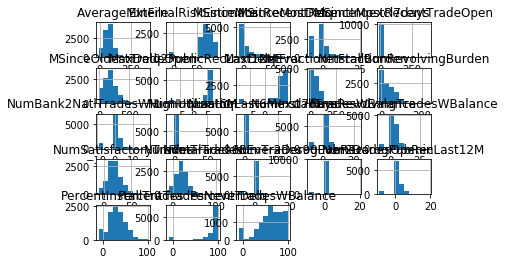

In [28]:
df.hist() 
plt.show() 

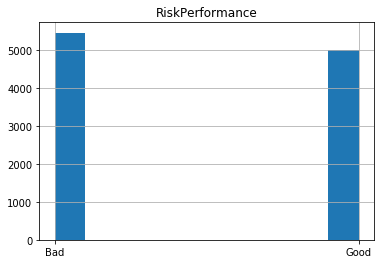

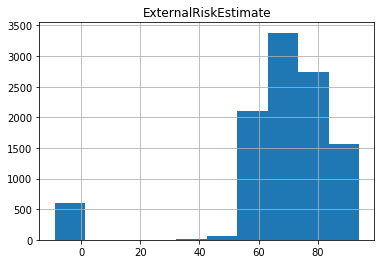

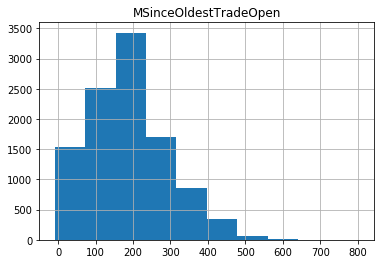

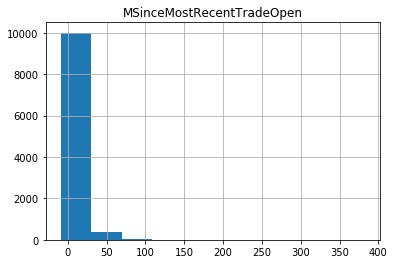

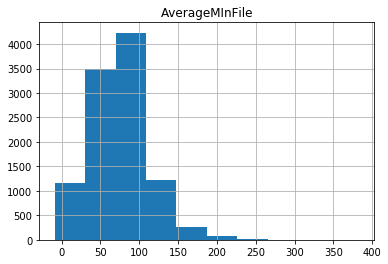

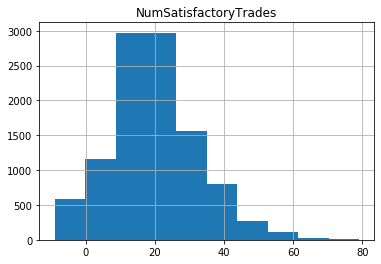

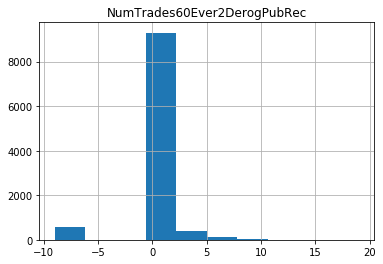

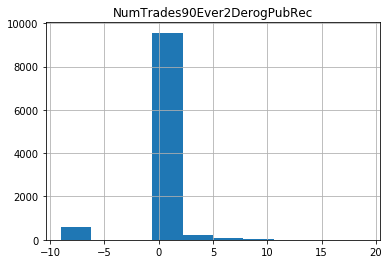

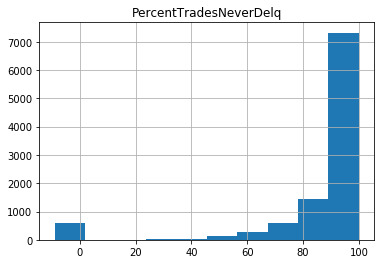

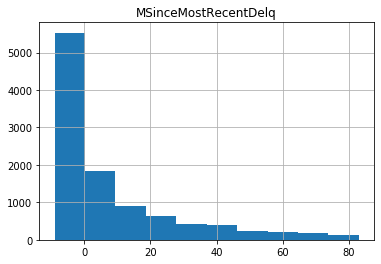

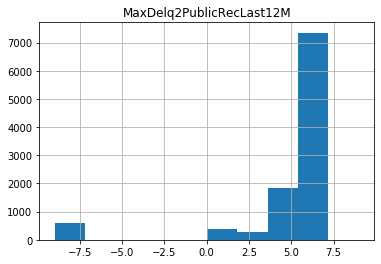

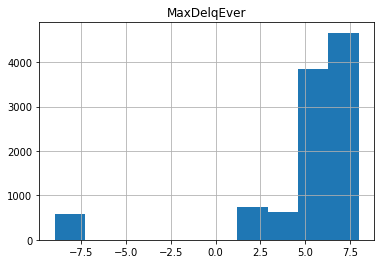

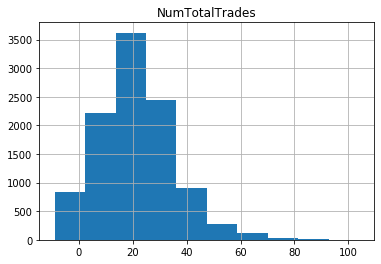

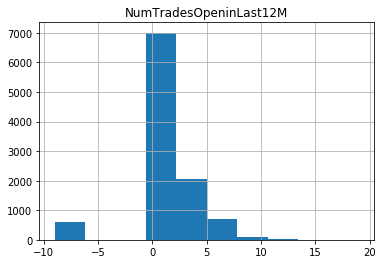

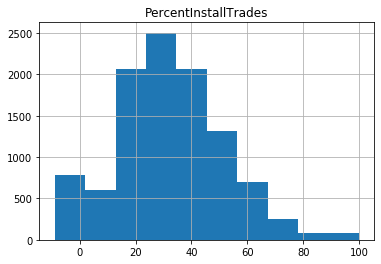

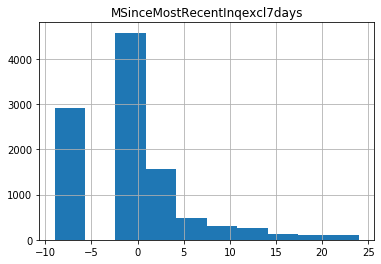

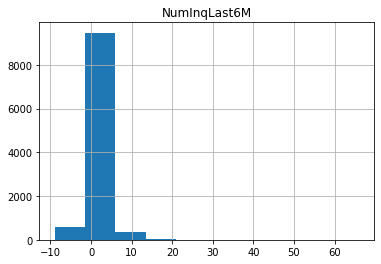

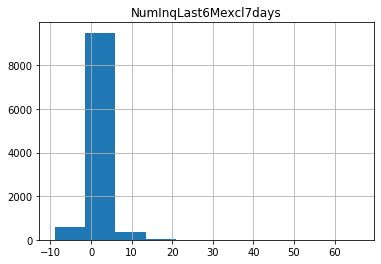

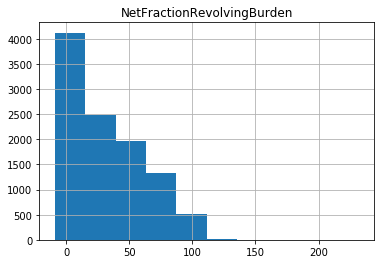

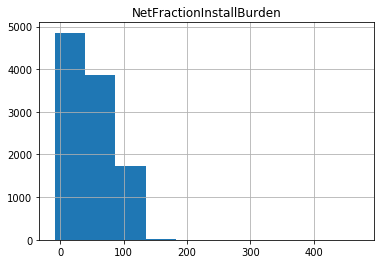

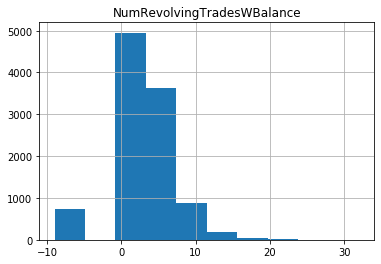

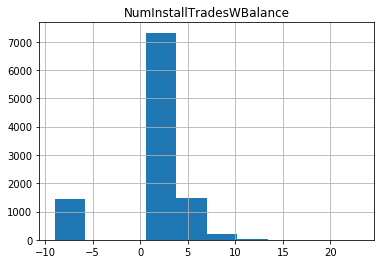

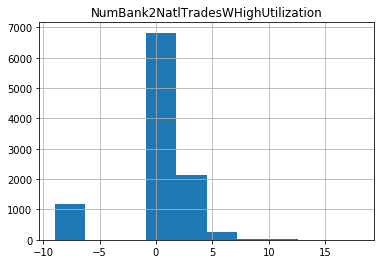

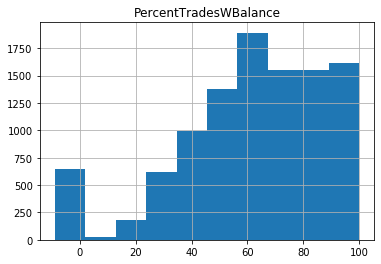

In [47]:
for x in df.columns:
    df[x].hist()
    plt.title(x)
    plt.show()

In [48]:
scatter_matrix(df) 
plt.show()


NameError: name 'scatter_matrix' is not defined

In [23]:
y = df['RiskPerformance'] 
X = df.drop('RiskPerformance', axis = 1) 
X_train, X_test, y_train, y_test = model_selection.train_test_split( 
                           X, y, test_size = 0.25, random_state = 0) 
  
print(X.head()) 
print('') 
print(y.head()) 

   ExternalRiskEstimate  MSinceOldestTradeOpen  MSinceMostRecentTradeOpen  \
0                    55                    144                          4   
1                    61                     58                         15   
2                    67                     66                          5   
3                    66                    169                          1   
4                    81                    333                         27   

   AverageMInFile  NumSatisfactoryTrades  NumTrades60Ever2DerogPubRec  \
0              84                     20                            3   
1              41                      2                            4   
2              24                      9                            0   
3              73                     28                            1   
4             132                     12                            0   

   NumTrades90Ever2DerogPubRec  PercentTradesNeverDelq  MSinceMostRecentDelq  \
0                 

In [25]:
algorithms = [] 
scores = [] 
names = [] 
  
algorithms.append(('Logisitic Regression', LogisticRegression())) 
algorithms.append(('K-Nearest Neighbours', KNeighborsClassifier())) 
algorithms.append(('Decision Tree Classifier', DecisionTreeClassifier())) 
algorithms.append(('LDA',LinearDiscriminantAnalysis())) 
algorithms.append(('Naive bayes clasifier', GaussianNB())) 
algorithms.append(('Support Vector Machine', SVC())) 
  
for name, algo in algorithms: 
    
    k_fold = model_selection.KFold(n_splits = 10, random_state=None )
  
    # Applying k-cross validation 
    cvResults = model_selection.cross_val_score(algo, X_train, y_train, 
                                      cv = k_fold, scoring ='accuracy') 
  
    scores.append(cvResults) 
    names.append(name) 
    print(str(name)+' : '+str(cvResults.mean())) 

c:\users\matsa\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\users\matsa\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\users\matsa\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\users\matsa\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\users\matsa\appdata\local\programs\python\python37\lib\si

Logisitic Regression : 0.7129088132068115
K-Nearest Neighbours : 0.6540062394384505
Decision Tree Classifier : 0.6315674964253217
LDA : 0.7140544975952163
Naive bayes clasifier : 0.6792491550760431


c:\users\matsa\appdata\local\programs\python\python37\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
c:\users\matsa\appdata\local\programs\python\python37\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
c:\users\matsa\appdata\local\programs\python\python37\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureW

Support Vector Machine : 0.5230743858052775


In [11]:
print(algorithms)

[('Logisitic Regression', LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)), ('K-Nearest Neighbours', KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')), ('Decision Tree Classifier', DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

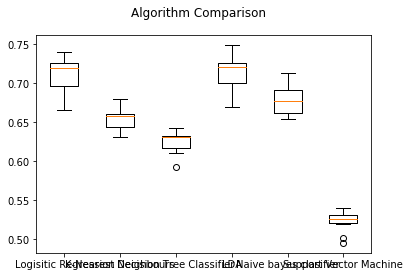

In [39]:
fig = plt.figure() 
fig.suptitle('Algorithm Comparison') 
ax = fig.add_subplot(111) 
plt.boxplot(scores) 
ax.set_xticklabels(names) 
plt.show() 

In [34]:
for name, algo in algorithms: 
    clf = algo 
    clf.fit(X_train, y_train) 
    y_pred = clf.predict(X_test) 
    pred_score = accuracy_score(y_test, y_pred) 
  
    print(str(name)+' : '+str(pred_score)) 
    print('') 
    print('Confusion Matrix: '+str(confusion_matrix(y_test, y_pred))) 
    print(classification_report(y_test, y_pred)) 

c:\users\matsa\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Logisitic Regression : 0.7223709369024857

Confusion Matrix: [[1032  324]
 [ 402  857]]
              precision    recall  f1-score   support

         Bad       0.72      0.76      0.74      1356
        Good       0.73      0.68      0.70      1259

    accuracy                           0.72      2615
   macro avg       0.72      0.72      0.72      2615
weighted avg       0.72      0.72      0.72      2615

K-Nearest Neighbours : 0.6780114722753346

Confusion Matrix: [[962 394]
 [448 811]]
              precision    recall  f1-score   support

         Bad       0.68      0.71      0.70      1356
        Good       0.67      0.64      0.66      1259

    accuracy                           0.68      2615
   macro avg       0.68      0.68      0.68      2615
weighted avg       0.68      0.68      0.68      2615

Decision Tree Classifier : 0.6340344168260038

Confusion Matrix: [[928 428]
 [529 730]]
              precision    recall  f1-score   support

         Bad       0.64      0.